## process crime data from Public Safety Statistics

Security statistics: Monthly historical series by police station area since 01/2003, sourced from [ISP Dados](https://www.ispdados.rj.gov.br/estatistica.html).


In [63]:
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [42]:
# Define output folder path
output_folder_path = os.path.join('..', '..', 'data','02_intermediate_output')

# Define data folder path
data_folder_path = os.path.join('..','..', 'data','01_input_data')

In [43]:
# Read CISP data CSV file
cisp_path = os.path.join(data_folder_path, 'isp_crime_cisp.csv')
cisp_df = pd.read_csv(cisp_path, sep=";", encoding="ISO-8859-1")

#display 
cisp_df.head()

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3


### translate portugese to english 

In [44]:
cisp_df = cisp_df.rename(columns={
    'cisp': 'cisp',
    'mes': 'month',
    'ano': 'year',
    'mes_ano': 'month_year',
    'aisp': 'aisp',
    'risp': 'risp',
    'munic': 'municipality',
    'mcirc': 'mcirc',
    'regiao': 'region',
    'hom_doloso': 'intentional_homicide',
    'lesao_corp_morte': 'bodily_injury_death',
    'latrocinio': 'robbery_with_death',
    'cvli': 'violent_crime',
    'hom_por_interv_policial': 'homicide_by_police_intervention',
    'letalidade_violenta': 'violent_lethality',
    'tentat_hom': 'attempted_homicide',
    'lesao_corp_dolosa': 'intentional_bodily_injury',
    'estupro': 'rape',
    'hom_culposo': 'culpable_homicide',
    'lesao_corp_culposa': 'culpable_bodily_injury',
    'roubo_transeunte': 'mugger_robbery',
    'roubo_celular': 'mobile_phone_robbery',
    'roubo_em_coletivo': 'collective_robbery',
    'roubo_rua': 'street_robbery',
    'roubo_veiculo': 'vehicle_robbery',
    'roubo_carga': 'cargo_theft',
    'roubo_comercio': 'commercial_robbery',
    'roubo_residencia': 'residential_robbery',
    'roubo_banco': 'bank_robbery',
    'roubo_cx_eletronico': 'atm_robbery',
    'roubo_conducao_saque': 'robbery_during_withdrawal',
    'roubo_apos_saque': 'robbery_after_withdrawal',
    'roubo_bicicleta': 'bicycle_robbery',
    'outros_roubos': 'other_robberies',
    'total_roubos': 'total_robberies',
    'furto_veiculos': 'vehicle_theft',
    'furto_transeunte': 'pedestrian_theft',
    'furto_coletivo': 'collective_theft',
    'furto_celular': 'mobile_phone_theft',
    'furto_bicicleta': 'bicycle_theft',
    'outros_furtos': 'other_thefts',
    'total_furtos': 'total_thefts',
    'sequestro': 'kidnapping',
    'extorsao': 'extortion',
    'sequestro_relampago': 'express_kidnapping',
    'estelionato': 'fraud',
    'apreensao_drogas': 'drug_seizure',
    'posse_drogas': 'drug_possession',
    'trafico_drogas': 'drug_trafficking',
    'apreensao_drogas_sem_autor': 'drug_seizure_without_author',
    'recuperacao_veiculos': 'vehicle_recovery',
    'apf': 'federal_police_arrest',
    'aaapai': 'apai_arrest',
    'cmp': 'arrest_warrant', # execution of arrest warrant ----Cumprimento de mandado de prisäo
    'cmba': 'search_warrant_and_seizure', #Execution of search warrant and seizure  ---- Cumprimento de mandado de busca apreensäo
    'ameaca': 'threat',
    'pessoas_desaparecidas': 'missing_people',
    'encontro_cadaver': 'cadaver_found',
    'encontro_ossada': 'skeleton_found',
    'pol_militares_mortos_serv': 'military_police_dead_in_service',
    'pol_civis_mortos_serv': 'civil_police_dead_in_service',
    'registro_ocorrencias': 'occurrence_registration',
    'fase': 'phase'
})

### Filter out relavent crime field

In [48]:
# Calculate total crimes per cisp
crime_types = ['intentional_homicide', 'bodily_injury_death', 'robbery_with_death', 'violent_crime',
               'homicide_by_police_intervention', 'violent_lethality', 'attempted_homicide',
               'intentional_bodily_injury', 'rape', 'culpable_homicide', 'culpable_bodily_injury',
               'mugger_robbery', 'mobile_phone_robbery', 'collective_robbery', 'street_robbery',
               'vehicle_robbery', 'cargo_theft', 'commercial_robbery', 'residential_robbery',
               'bank_robbery', 'atm_robbery', 'robbery_during_withdrawal', 'robbery_after_withdrawal',
               'bicycle_robbery', 'other_robberies', 'vehicle_theft',
               'pedestrian_theft', 'collective_theft', 'mobile_phone_theft', 'bicycle_theft',
               'other_thefts',  'kidnapping', 'extortion', 'express_kidnapping',
               'fraud', 'drug_seizure', 'drug_possession', 'drug_trafficking',
               'drug_seizure_without_author', 'vehicle_recovery', 'federal_police_arrest',
               'apai_arrest', 'arrest_warrant', 'search_warrant_and_seizure', 'threat', 'missing_people', 'cadaver_found',
               'skeleton_found', 'military_police_dead_in_service', 'civil_police_dead_in_service'
               ]

### find crime occurance per cisp region

In [49]:
crime_counts_per_cisp = cisp_df.groupby('cisp')[crime_types].sum().reset_index()
crime_counts_per_cisp = crime_counts_per_cisp.rename(columns=lambda x: x + '_total' if x != 'cisp' else x)
crime_counts_per_cisp.head()

,cisp,intentional_homicide_total,bodily_injury_death_total,robbery_with_death_total,violent_crime_total,homicide_by_police_intervention_total,violent_lethality_total,attempted_homicide_total,intentional_bodily_injury_total,rape_total,...,federal_police_arrest_total,apai_arrest_total,arrest_warrant_total,search_warrant_and_seizure_total,threat_total,missing_people_total,cadaver_found_total,skeleton_found_total,military_police_dead_in_service_total,civil_police_dead_in_service_total
0,1,84,3,19,106,7,113,117,4891,141,...,4564.0,1085.0,2818.0,305.0,4672,301,61,3,0,0
1,4,433,19,18,470,101,571,838,7864,345,...,4865.0,1461.0,2220.0,978.0,5014,822,173,4,4,1
2,5,231,7,21,259,29,288,357,12569,462,...,9885.0,2507.0,3999.0,695.0,9663,694,147,1,4,1
3,6,800,15,25,840,379,1219,1180,9812,521,...,3837.0,954.0,2259.0,219.0,6703,708,107,3,14,1
4,7,185,1,8,194,105,299,517,3624,200,...,936.0,276.0,455.0,53.0,3092,242,63,12,5,0


### save Crime count per cisp data for further processing

In [46]:
crime_counts_per_cisp.to_csv(os.path.join(output_folder_path, 'crime_counts_per_cisp.csv'), index=False)

## Plots

### find share of crime per cisp region

In [51]:
# Create a new DataFrame to hold the total crimes and percentages
crime_stats_share = crime_counts_per_cisp.copy()

# Sum the total crimes across all crime types to get the overall total crimes per CISP
crime_stats_share['total_crimes'] = crime_stats_share.iloc[:, 1:].sum(axis=1)

# Calculate the percentage of each crime type per CISP
for crime_type in crime_types:
    crime_stats_share[crime_type + '_percentage'] = (crime_stats_share[crime_type + '_total'] / 
                                                        crime_stats_share['total_crimes']) * 100

# Now you have a new DataFrame with the total number of each crime type and their respective percentages per CISP
crime_stats_share.head()

,cisp,intentional_homicide_total,bodily_injury_death_total,robbery_with_death_total,violent_crime_total,homicide_by_police_intervention_total,violent_lethality_total,attempted_homicide_total,intentional_bodily_injury_total,rape_total,...,federal_police_arrest_percentage,apai_arrest_percentage,arrest_warrant_percentage,search_warrant_and_seizure_percentage,threat_percentage,missing_people_percentage,cadaver_found_percentage,skeleton_found_percentage,military_police_dead_in_service_percentage,civil_police_dead_in_service_percentage
0,1,84,3,19,106,7,113,117,4891,141,...,2.832285,0.673319,1.748768,0.189274,2.899306,0.186792,0.037855,0.001862,0.000000,0.000000
1,4,433,19,18,470,101,571,838,7864,345,...,2.782815,0.835702,1.269856,0.559423,2.868044,0.470190,0.098957,0.002288,0.002288,0.000572
2,5,231,7,21,259,29,288,357,12569,462,...,3.739078,0.948292,1.512653,0.262889,3.655105,0.262511,0.055604,0.000378,0.001513,0.000378
3,6,800,15,25,840,379,1219,1180,9812,521,...,2.937686,0.730402,1.729537,0.167671,5.131955,0.542059,0.081921,0.002297,0.010719,0.000766
4,7,185,1,8,194,105,299,517,3624,200,...,2.096023,0.618058,1.018900,0.118685,6.924042,0.541920,0.141078,0.026872,0.011197,0.000000


print count and share of total crime recorded over the years

In [54]:
# Calculate the total number of crimes across all CISPs
total_crimes = cisp_df[crime_types].sum()

# Calculate the total number of crimes
total_count = total_crimes.sum()

# Sort the crime types by percentage in descending order
sorted_crime_types = total_crimes.sort_values(ascending=False)

# Create a DataFrame to store the total counts and percentages
total_crimes_df = pd.DataFrame({
    'crime_type': sorted_crime_types.index,
    'total_count': sorted_crime_types.values,
    'percentage': [(count / total_count) * 100 for count in sorted_crime_types.values]
})


total_crimes_df.head(10)

,crime_type,total_count,percentage
0,other_thefts,1811094.0,11.989232
1,street_robbery,1650560.0,10.926516
2,intentional_bodily_injury,1509036.0,9.989643
3,threat,1382781.0,9.153850
4,mugger_robbery,1194884.0,7.909993
5,fraud,802804.0,5.314469
6,culpable_bodily_injury,735391.0,4.868203
7,vehicle_robbery,651139.0,4.310465
8,federal_police_arrest,521604.0,3.452958
9,vehicle_recovery,479540.0,3.174499


### plot in temporal scale

In [50]:
# convert to datetime format
cisp_df['date'] = pd.to_datetime(cisp_df['year'].astype(str) + '-' + cisp_df['month'].astype(str) + '-1')
cisp_df.head()

,cisp,month,year,month_year,aisp,risp,municipality,mcirc,region,intentional_homicide,...,search_warrant_and_seizure,threat,missing_people,cadaver_found,skeleton_found,military_police_dead_in_service,civil_police_dead_in_service,occurrence_registration,phase,date
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,21,2,0,0,0,0,578,3,2003-01-01
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,15,6,0,1,0,0,441,3,2003-01-01
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,47,2,1,0,0,0,637,3,2003-01-01
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,26,2,1,0,0,0,473,3,2003-01-01
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,10,1,3,0,0,0,147,3,2003-01-01


Calculate how many crimes occur year.

In [56]:
# Sum crimes per year
yearly_crime_counts = cisp_df.groupby('year')[crime_types].sum().reset_index()
yearly_crime_counts.head()

,year,intentional_homicide,bodily_injury_death,robbery_with_death,violent_crime,homicide_by_police_intervention,violent_lethality,attempted_homicide,intentional_bodily_injury,rape,...,federal_police_arrest,apai_arrest,arrest_warrant,search_warrant_and_seizure,threat,missing_people,cadaver_found,skeleton_found,military_police_dead_in_service,civil_police_dead_in_service
0,2003,6624,56,179,6859,1195,8054,4124,78228,2577,...,0.0,0.0,0.0,0.0,69472,4800,1625,53,43,7
1,2004,6438,39,185,6662,983,7645,3648,75008,2917,...,0.0,0.0,0.0,0.0,65343,4559,1230,48,50,0
2,2005,6620,59,210,6889,1098,7987,3906,77949,3565,...,0.0,0.0,0.0,0.0,64921,4397,911,42,24,9
3,2006,6323,55,208,6586,1063,7649,4022,75550,3200,...,15598.0,3655.0,8920.0,509.0,61800,4562,826,49,27,2
4,2007,6133,44,192,6369,1330,7699,4087,73908,3222,...,17382.0,3527.0,10557.0,546.0,62606,4633,766,40,23,9


classify crime into  4 categories

In [24]:
classification = {
    'Essential': [
        'intentional_homicide', 'bodily_injury_death', 'robbery_with_death', 
        'violent_crime', 'homicide_by_police_intervention', 'violent_lethality',
        'attempted_homicide', 'intentional_bodily_injury', 'rape', 
        'culpable_homicide', 'culpable_bodily_injury'
    ],
    'Significant': [
        'kidnapping', 'express_kidnapping', 'threat', 'missing_people'
    ],
    'Minor': [
        'vehicle_recovery', 'federal_police_arrest', 'apai_arrest', 
        'arrest_warrant', 'search_warrant_and_seizure', 'threat', 
        'missing_people', 'cadaver_found', 'skeleton_found', 
        'military_police_dead_in_service', 'civil_police_dead_in_service', 
        'drug_seizure', 'drug_possession', 'drug_trafficking', 
        'drug_seizure_without_author'
    ],
    'Relevant': [
        'extortion', 'vehicle_theft', 'pedestrian_theft', 'collective_theft', 
        'mobile_phone_theft', 'bicycle_theft', 'cargo_theft', 'other_thefts',
        'mugger_robbery', 'mobile_phone_robbery', 
        'collective_robbery', 'street_robbery', 'vehicle_robbery', 
        'commercial_robbery', 'residential_robbery', 'bank_robbery', 
        'atm_robbery', 'robbery_during_withdrawal', 'robbery_after_withdrawal', 
        'bicycle_robbery', 'other_robberies'
    ]
}

# Initialize a dictionary to store the yearly counts for each category
yearly_category_counts = yearly_crime_counts[['year']].copy()

for category, crimes in classification.items():
    yearly_category_counts[category] = yearly_crime_counts[crimes].sum(axis=1)


In [57]:
yearly_category_counts.head()

,year,Essential,Significant,Relevant,Minor
0,2003,149620,74313,275747.0,119297.0
1,2004,146208,69949,270667.0,109759.0
2,2005,147476,69438,294328.0,108397.0
3,2006,142605,66441,331487.0,144427.0
4,2007,145249,67286,373051.0,144679.0


plot yearly crime bars

In [60]:

# Define the patterns and colors for the four crime categories
patterns = ['', '', '/', 'o']  # empty string for solid colors, 'o' for dots
colors = ['black', 'white', 'white', 'white']

# Mapping classification to their respective order and patterns/colors
classification_order = ['Essential', 'Significant', 'Relevant', 'Minor']


# Initialize a dictionary to store the yearly counts for each category
yearly_category_counts = yearly_crime_counts[['year']].copy()

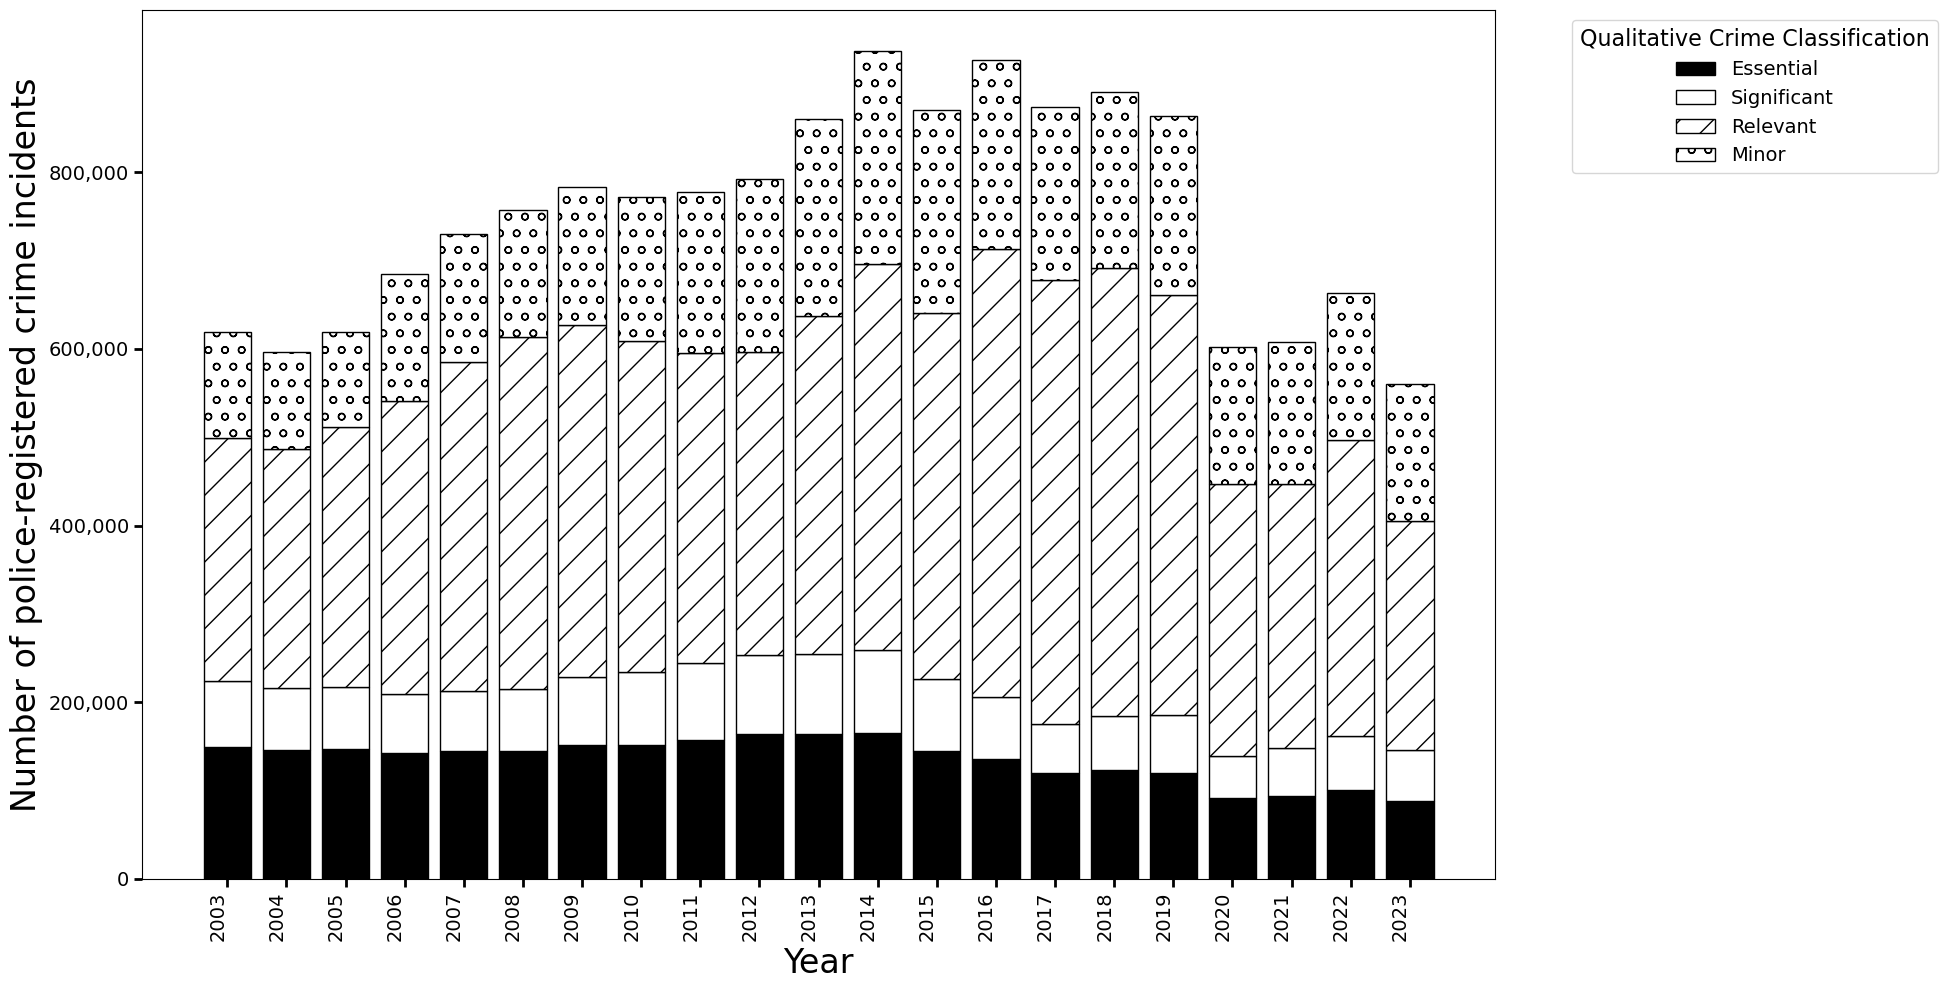

In [67]:
# Prepare the data
for category in classification_order:
    yearly_category_counts[category] = yearly_crime_counts[classification[category]].sum(axis=1)

# Set the figure size
fig, ax = plt.subplots(figsize=(20, 10))

# Initialize the bottom position for stacking bars
bottom = np.zeros(len(yearly_category_counts))

# Plot each category as a stacked bar
bar_width = 0.8  # Reduce the width of the bars
for i, category in enumerate(classification_order):
    ax.bar(
        yearly_category_counts['year'], 
        yearly_category_counts[category], 
        bottom=bottom, 
        label=category, 
        color=colors[i % len(colors)], 
        edgecolor='black', 
        hatch=patterns[i % len(patterns)],
        width=bar_width, 
        align='center'  # Ensure bars are centered on x-ticks
    )
    bottom += yearly_category_counts[category]

# Set x-axis ticks and labels
ax.set_xticks(yearly_category_counts['year'])
ax.set_xticklabels(yearly_category_counts['year'], rotation=90, ha='right')

# Set labels and title
ax.set_xlabel('Year', fontsize=24)
ax.set_ylabel('Number of police-registered crime incidents', fontsize=24)

# Format y-axis to have commas for thousands
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
ax.yaxis.set_major_formatter(formatter)

# Set tick parameters
ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=2)
ax.tick_params(axis='x', which='minor', length=4, width=2)

# Ensure plot area background is white
ax.set_facecolor('white')

# Adjust legend
ax.legend(
    title='Qualitative Crime Classification', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    fontsize=14, 
    title_fontsize=16,
    frameon=True,  # Add frame to the legend
    shadow=False  # Add shadow for better distinction
)

# Adjust layout
fig.tight_layout()
fig.subplots_adjust(right=0.75)  # Adjust right margin to fit the legend

# Show the plot
plt.show()